In [2]:
import pandas as pd

In [52]:
df = pd.read_csv("data/all_drinks.csv")
df = df.head(15)

In [53]:
df.head()

,Unnamed: 0,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,...,strMeasure15,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo
0,0,'57 Chevy with a White License Plate,2016-07-18 22:49:04,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,Creme de Cacao,...,NaN,1 oz,,,,,,NaN,NaN,NaN
1,1,1-900-FUK-MEUP,2016-07-18 22:27:04,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Absolut Kurant,...,NaN,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/2 oz,1/4 oz,,NaN
2,2,110 in the shade,2016-02-03 14:51:57,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,NaN,Lager,...,NaN,1.5 oz,,,,,,NaN,NaN,NaN
3,3,151 Florida Bushwacker,2016-07-18 22:28:43,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,NaN,Malibu rum,...,NaN,1/2 oz,1/2 oz Bacardi,1 oz,1 oz,3 oz,1 oz,1 cup,,NaN
4,4,155 Belmont,2016-10-05 12:36:28,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,NaN,Dark rum,...,NaN,2 shots,1 shot,1 shot,,,,,,NaN


In [54]:
df[["strDrink", "idDrink", "strIngredient1", "strIngredient2", "strIngredient3", "strIngredient4"]].head(10)

,strDrink,idDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4
0,'57 Chevy with a White License Plate,14029,Creme de Cacao,Vodka,NaN,NaN
1,1-900-FUK-MEUP,15395,Absolut Kurant,Grand Marnier,Chambord raspberry liqueur,Midori melon liqueur
2,110 in the shade,15423,Lager,Tequila,NaN,NaN
3,151 Florida Bushwacker,14588,Malibu rum,Light rum,151 proof rum,Dark Creme de Cacao
4,155 Belmont,15346,Dark rum,Light rum,Vodka,Orange juice
5,24k nightmare,17060,Goldschlager,Jägermeister,Rumple Minze,151 proof rum
6,252,15288,151 proof rum,Wild Turkey,NaN,NaN
7,3 Wise Men,13899,Jack Daniels,Johnnie Walker,Jim Beam,NaN
8,3-Mile Long Island Iced Tea,15300,Gin,Light rum,Tequila,Triple sec
9,410 Gone,13581,Peach Vodka,Coca-Cola,NaN,NaN


In [55]:
new_data = {'idDrink': [], 'Ingredient': []}

for _, row in df.iterrows():
    drink_id = row['idDrink']
    ingredients = [row['strIngredient1'], row['strIngredient2'], row['strIngredient3'], row['strIngredient4']]
    ingredients = [ing for ing in ingredients if pd.notna(ing)]  # Usunięcie wartości NaN
    for ingredient in ingredients:
        new_data['idDrink'].append(drink_id)
        new_data['Ingredient'].append(ingredient)

new_df = pd.DataFrame(new_data)

In [56]:
new_df

,idDrink,Ingredient
0,14029,Creme de Cacao
1,14029,Vodka
2,15395,Absolut Kurant
3,15395,Grand Marnier
4,15395,Chambord raspberry liqueur
5,15395,Midori melon liqueur
6,15423,Lager
7,15423,Tequila
8,14588,Malibu rum
9,14588,Light rum


In [57]:
import hypernetx as hnx
from hypernetx import Hypergraph

H = Hypergraph(new_df, edge_col="idDrink", node_col="Ingredient")

/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:1494: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/opt/miniconda3/envs/sz/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to T

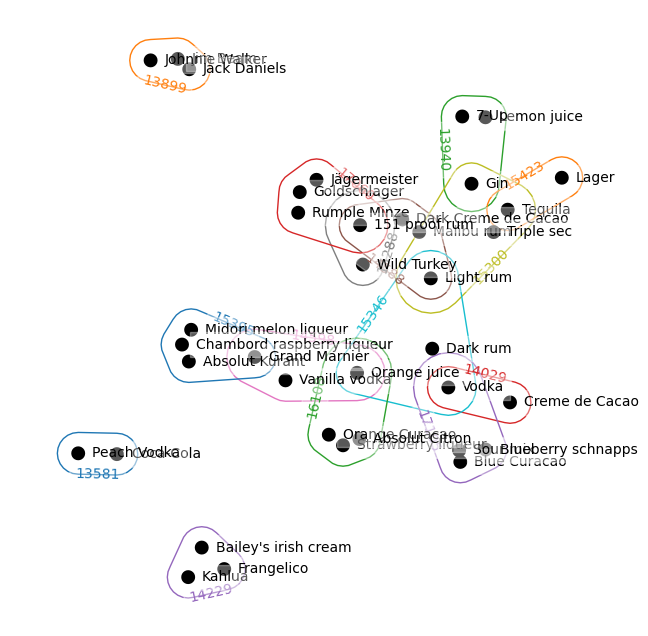

In [60]:
hnx.draw(H)

In [65]:
list(H.nodes())

['151 proof rum',
 '7-Up',
 'Absolut Citron',
 'Absolut Kurant',
 "Bailey's irish cream",
 'Blue Curacao',
 'Blueberry schnapps',
 'Chambord raspberry liqueur',
 'Coca-Cola',
 'Creme de Cacao',
 'Dark Creme de Cacao',
 'Dark rum',
 'Frangelico',
 'Gin',
 'Goldschlager',
 'Grand Marnier',
 'Jack Daniels',
 'Jim Beam',
 'Johnnie Walker',
 'Jägermeister',
 'Kahlua',
 'Lager',
 'Lemon juice',
 'Light rum',
 'Malibu rum',
 'Midori melon liqueur',
 'Orange Curacao',
 'Orange juice',
 'Peach Vodka',
 'Rumple Minze',
 'Sour mix',
 'Strawberry liqueur',
 'Tequila',
 'Triple sec',
 'Vanilla vodka',
 'Vodka',
 'Wild Turkey']

In [66]:
dir(H)

['E',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cell_weight_col',
 '_data_cols',
 '_dataframe',
 '_edge_col',
 '_edges',
 '_node_col',
 '_nodes',
 '_set_default_state',
 '_state_dict',
 'adjacency_matrix',
 'aggregateby',
 'auxiliary_matrix',
 'bipartite',
 'cell_properties',
 'cell_weight_col',
 'cell_weights',
 'collapse_edges',
 'collapse_nodes',
 'collapse_nodes_and_edges',
 'component_subgraphs',
 'components',
 'connected_component_subgraphs',
 'connected_components',
 'data_cols',
 'dataframe',
 'default_edge_weight',
 'default_node_weight',
 'default_weight',
 'degree',
 'diamete

In [77]:
H.neighbors('Peach Vodka')

['Coca-Cola']

In [81]:
list(H.s_components())

[{13940,
  14029,
  14588,
  14598,
  15288,
  15300,
  15346,
  15395,
  15423,
  16108,
  17060,
  17105},
 {13581},
 {13899},
 {14229}]